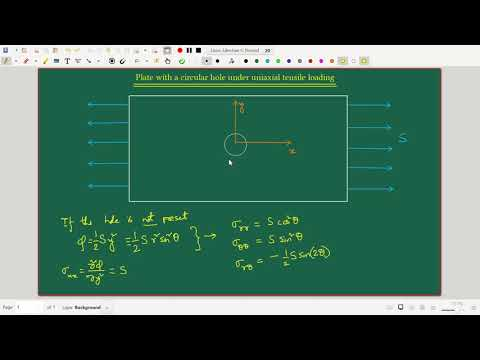

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('ZHOoElDnkuY')

# Plate with a circular hole subjected to uniaxial tensile loading

<img src="https://nbviewer.jupyter.org/github/jeevanjyoti4/elasticity/blob/master/Plate-CircularHole.svg" width="300"/>


In order to address this problem, first imagine that the hole does not exist. Then it is a simple problem of uniaxial tension of a plate. 

Referred to a rectangular Cartesian coordinate system, the stress field for that (no-hole) problem will be $\sigma_{xx} = S$, $\sigma_{yy} = 0$, and $\sigma_{xy} = 0$. This stress field is easily realized by using the Airy stress function $\displaystyle \varphi = \frac{1}{2}Sy^2$. Here, $x$ is parallel to the direction of the applied tensile load. 

Converting to a polar coordinate system, we have for the Airy stress function: $\displaystyle \varphi = \frac{1}{2} S r^2 \sin^2\theta$. 

In [1]:
from polarUtilities import *
from IPython.display import Math, Latex

In [4]:
S = symbols('S')
phi = Rational(1,2)*S*r**2*(sin(theta))**2
display(Math(r'\varphi = {}'.format(latex(phi))))

<IPython.core.display.Math object>

In [5]:
sigmarr = sigma_rr(phi)
sigmatt = sigma_tt(phi)
sigmart = sigma_rt(phi)

display(Math(r'\sigma_{{rr}} = {}'.format(latex(sigmarr))))
display(Math(r'\sigma_{{\theta\theta}} = {}'.format(latex(sigmarr))))
display(Math(r'\sigma_{{r\theta}} = {}'.format(latex(sigmart))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

We remind ourselves that the above stress field was obtained by imagining the hole to be absent. However, even if the hole is present, we would still have the above stress field at sufficiently large distances from the hole. 

Consider a circle of radius $b$ concentric with the hole such that $b \gg a$. We note that at the radius $r=b$, the above stress field is applicable. 

Now, we are going to bring back the hole. The stress distribution around the hole can be determined by solving a circular plate problem where the boundary conditions are given by
\begin{alignat*}{2}
\sigma_{rr} &= S\cos^2\theta &\quad \text{at $r=b$}\\
\sigma_{r\theta} &= -\frac{1}{2}S \sin(2\theta) &\quad \text{at $r=b$} \\
\sigma_{rr} &= 0 &\quad \text{at $r=a$} \\
\sigma_{r\theta} &= 0 &\quad \text{at $r=a$}
\end{alignat*}

We rewrite $\sigma_{rr} = S \cos^2 \theta$ as $\displaystyle \sigma_{rr} =\frac{1}{2}S(1+\cos(2\theta))$ and view it as the contribution of the two parts $\displaystyle \frac{1}{2}S$ and $\displaystyle \frac{1}{2}S \cos(2\theta)$, separately. 

Therefore, the circular plate problem can be further divided into two problems with the following boundary conditions:

### Problem 1 BCs
\begin{alignat*}{2}
\sigma_{rr} &= \frac{1}{2}S &\quad \text{at $r=b$}\\
\sigma_{r\theta} &= 0 &\quad \text{at $r=b$} \\
\sigma_{rr} &= 0 &\quad \text{at $r=a$} \\
\sigma_{r\theta} &= 0 &\quad \text{at $r=a$}
\end{alignat*}

### Problem 2 BCs
\begin{alignat*}{2}
\sigma_{rr} &= \frac{1}{2}S \cos (2\theta) &\quad \text{at $r=b$}\\
\sigma_{r\theta} &= -\frac{1}{2}S \sin(2\theta) &\quad \text{at $r=b$} \\
\sigma_{rr} &= 0 &\quad \text{at $r=a$} \\
\sigma_{r\theta} &= 0 &\quad \text{at $r=a$}
\end{alignat*}

We will solve these two problems separately and then add the solutions. 

### Problem 1
This problem has axisymmetric conditions and we consider the following Airy stress function:

In [6]:
phi1 = Function('varphi1')(r)
display(phi1)

varphi1(r)

This $\varphi_1$ must satisfy the biharmonic equation, and we obtain as its solution the following:

In [7]:
dsolve(polarbiharmonic(phi1))

Eq(varphi1(r), C1 + C2*r**2 + C3*r**2*log(r) + C4*log(r))

We rewrite $\varphi_1(r)$ in terms of the constants $A$, $B$, $C$, and $D$ as

In [8]:
A, B, C, D = symbols('A, B, C, D')
phi1 = A*log(r)+B*r**2*log(r)+C*r**2 + D
phi1

A*log(r) + B*r**2*log(r) + C*r**2 + D

However, we note that as per the first problem discussed in 2D elasticity - polar coordinates, for this problem we need to have $B=0$. Then, we have the following:

In [9]:
sigmarr1 = sigma_rr(phi1).subs(B,0)
sigmatt1 = sigma_tt(phi1).subs(B,0)
sigmart1 = sigma_rt(phi1)
display(sigmarr1, sigmatt1, sigmart1)

A/r**2 + 2*C

-A/r**2 + 2*C

0

We now set up the four boundary condition equations for Problem 1. 

In [10]:
a, b = symbols('a, b')

lhs = sigmarr1.subs(r,b)
rhs = Rational(1,2)*S
eq1 = Eq(lhs,rhs)
display(eq1)

lhs = sigmarr1.subs(r,a)
rhs = 0
eq2 = Eq(lhs,rhs)
display(eq2)

lhs = sigmart1.subs(r,b)
rhs = 0
eq3 = Eq(lhs,rhs)
display(eq3)

lhs = sigmart1.subs(r,a)
rhs = 0
eq4 = Eq(lhs,rhs)
display(eq4)

soln, = linsolve([eq1,eq2],(A,C))
Asoln = soln[0]
Csoln = soln[1]
display(Asoln,Csoln)

Eq(A/b**2 + 2*C, S/2)

Eq(A/a**2 + 2*C, 0)

True

True

S*a**2*b**2/(2*(a**2 - b**2))

-S*b**2/(4*a**2 - 4*b**2)

Using the expressions of $A$ and $C$, we obtain:

In [11]:
sigmarr1_soln = sigmarr1.subs([(A,Asoln),(C,Csoln)])
sigmatt1_soln = sigmatt1.subs([(A,Asoln),(C,Csoln)])
display(sigmarr1_soln,sigmatt1_soln)

S*a**2*b**2/(2*r**2*(a**2 - b**2)) - 2*S*b**2/(4*a**2 - 4*b**2)

-S*a**2*b**2/(2*r**2*(a**2 - b**2)) - 2*S*b**2/(4*a**2 - 4*b**2)

Finally, we take the limit of $b \gg a$ by letting $b \to \infty$, to obtain the stress fields:

In [13]:
sigmarr1_lim = limit(sigmarr1_soln,b,oo)
sigmatt1_lim = limit(sigmatt1_soln,b,oo)

display(Math(r'\sigma_{{rr}}^{{(1)}} = {}'.format(latex(sigmarr1_lim))))
display(Math(r'\sigma_{{\theta\theta}}^{{(1)}} = {}'.format(latex(sigmatt1_lim))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Problem 2
This problem needs to satisfy the boundary conditions $\displaystyle \sigma_{rr} = \frac{1}{2}S \cos(2\theta)$ and $\displaystyle \sigma_{r\theta} = \frac{1}{2} \sin(2\theta)$ at $r=b$, where $b \gg a$. 

A stress field with $\sigma_{rr}$ proportional to $\cos(2\theta)$ and $\sigma_{r\theta}$ proportional to $\sin(2\theta)$ can be realized by considering an Airy stress function of the following form:

In [14]:
g = Function('g')(r)
phi2 = g*cos(2*theta)
display(Math(r'\varphi_2 = {}'.format(latex(phi2))))

<IPython.core.display.Math object>

This $\varphi_2$ must again satisfy the biharmonic equation. Solving the biharmonic equation, we obtain as the solution form for $g(r)$ as follows:

In [15]:
dsolve(polarbiharmonic(phi2))

Eq(g(r), C1 + C2/r**2 + C3*r**2 + C4*r**4)

In [16]:
A, B, C, D = symbols('A, B, C, D')
phi2 = (A*r**2 + B*r**4 + C*1/r**2 + D)*cos(2*theta)
phi2

(A*r**2 + B*r**4 + C/r**2 + D)*cos(2*theta)

In [17]:
sigmarr2 = sigma_rr(phi2).collect(cos(2*theta))
sigmatt2 = sigma_tt(phi2).collect(cos(2*theta))
sigmart2 = sigma_rt(phi2).collect(sin(2*theta))

display(sigmarr2)
display(sigmatt2)
display(sigmart2)

(-2*A - 6*C/r**4 - 4*D/r**2)*cos(2*theta)

2*(A*r**4 + 6*B*r**6 + 3*C)*cos(2*theta)/r**4

(2*A + 6*B*r**2 - 6*C/r**4 - 2*D/r**2)*sin(2*theta)

In [18]:
a, b = symbols('a,b')

lhs = sigmarr2.subs(r,b)/cos(2*theta)
rhs = Rational(1,2)*S
eq1 = Eq(lhs,rhs)
display(eq1)

lhs = sigmarr2.subs(r,a)/cos(2*theta)
rhs = 0
eq2 = Eq(lhs,rhs)
display(eq2)

lhs = sigmart2.subs(r,b)/sin(2*theta)
rhs = -Rational(1,2)*S
eq3 = Eq(lhs,rhs)
display(eq3)

lhs = sigmart2.subs(r,a)/sin(2*theta)
rhs = 0
eq4 = Eq(lhs,rhs)
display(eq4)

Eq(-2*A - 6*C/b**4 - 4*D/b**2, S/2)

Eq(-2*A - 6*C/a**4 - 4*D/a**2, 0)

Eq(2*A + 6*B*b**2 - 6*C/b**4 - 2*D/b**2, -S/2)

Eq(2*A + 6*B*a**2 - 6*C/a**4 - 2*D/a**2, 0)

In [19]:
soln, = linsolve([eq1,eq2,eq3,eq4],(A,B,C,D))

In [20]:
Asoln = soln[0]
Bsoln = soln[1]
Csoln = soln[2]
Dsoln = soln[3]

display(Asoln, Bsoln, Csoln, Dsoln)

S*b**2*(4*a**4 + a**2*b**2 + b**4)/(4*(a**6 - 3*a**4*b**2 + 3*a**2*b**4 - b**6))

-S*a**2*b**2/(2*a**6 - 6*a**4*b**2 + 6*a**2*b**4 - 2*b**6)

S*a**4*b**4*(a**2 + b**2)/(4*(a**6 - 3*a**4*b**2 + 3*a**2*b**4 - b**6))

-S*a**2*b**2*(a**4 + a**2*b**2 + b**4)/(2*a**6 - 6*a**4*b**2 + 6*a**2*b**4 - 2*b**6)

In [21]:
Asoln_lim = limit(Asoln,b,oo)
Bsoln_lim = limit(Bsoln,b,oo)
Csoln_lim = limit(Csoln,b,oo)
Dsoln_lim = limit(Dsoln,b,oo)

display(Asoln_lim, Bsoln_lim, Csoln_lim, Dsoln_lim)

-S/4

0

-S*a**4/4

S*a**2/2

In [22]:
sigmarr2_lim = sigmarr2.subs([(A,Asoln_lim),(B,Bsoln_lim),(C,Csoln_lim),(D,Dsoln_lim)])
sigmatt2_lim = sigmatt2.subs([(A,Asoln_lim),(B,Bsoln_lim),(C,Csoln_lim),(D,Dsoln_lim)])
sigmart2_lim = sigmart2.subs([(A,Asoln_lim),(B,Bsoln_lim),(C,Csoln_lim),(D,Dsoln_lim)])
display(sigmarr2_lim)
display(sigmatt2_lim)
display(sigmart2_lim)

(3*S*a**4/(2*r**4) - 2*S*a**2/r**2 + S/2)*cos(2*theta)

2*(-3*S*a**4/4 - S*r**4/4)*cos(2*theta)/r**4

(3*S*a**4/(2*r**4) - S*a**2/r**2 - S/2)*sin(2*theta)

Finally, we combine the solutions of Problems 1 and 2 as follows:

In [23]:
sigmarr_final = sigmarr1_lim + sigmarr2_lim
sigmatt_final = sigmatt1_lim + sigmatt2_lim
sigmart_final = 0 + sigmart2_lim
display(Math(r'\sigma_{{rr}}^{{\rm final}} = {}'.format(latex(sigmarr_final))))
display(Math(r'\sigma_{{\theta\theta}}^{{\rm final}} = {}'.format(latex(sigmatt_final))))
display(Math(r'\sigma_{{r\theta}}^{{\rm final}} = {}'.format(latex(sigmart_final))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

These expressions of the stress components can be non-dimensionalized using the following scheme:

\begin{gather*}
\sigma_{rr} = \bar{\sigma}_{rr} S, \quad \sigma_{\theta \theta} = \bar{\sigma}_{\theta\theta} S, \quad \sigma_{r\theta} = \bar{\sigma}_{r\theta} S, \\
r = \bar{r} a
\end{gather*}

Then the dimensionless stress component expressions become:

\begin{align*}
\bar{\sigma}_{rr}^{\rm final} &= \frac{1}{2}\left(1-\frac{1}{\bar{r}^2}\right) + \frac{1}{2}\left(  1 + \frac{3}{\bar{r}^4} - \frac{4}{\bar{r}^2} \right)\cos(2\theta) \\
\bar{\sigma}_{\theta\theta}^{\rm final} &= \frac{1}{2}\left(1+\frac{1}{\bar{r}^2}\right) - \frac{1}{2} \left( 1 + \frac{3}{\bar{r}^4} \right) \cos(2\theta) \\
\bar{\sigma}_{r\theta}^{\rm final} &= -\frac{1}{2} \left( 1 - \frac{3}{\bar{r}^4} + \frac{2}{\bar{r}^2} \right) \sin (2\theta)
\end{align*}

We can visualize these dimensionless stress components in the form of surface plots as follows:

<IPython.core.display.Javascript object>


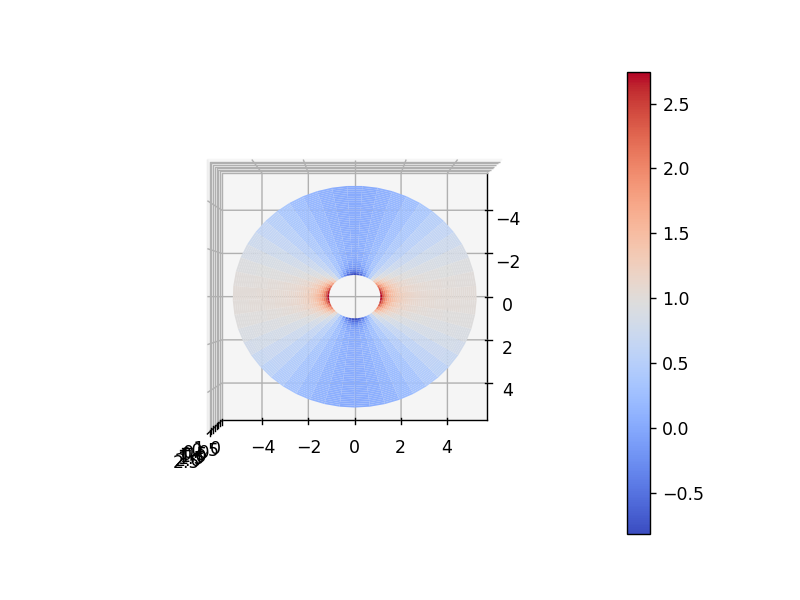

In [24]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

rbar = np.linspace(1, 5, 50)
tbar = np.linspace(0, 2*np.pi, 50)
R, T = np.meshgrid(rbar, tbar)

sigmarr_num = -1/(2*R**2) + (1.5/R**4 - 2/R**2 + 0.5)*np.cos(2*T) + 0.5
sigmatt_num = 0.5/R**2 + (-1.5/R**4 - 0.5)*np.cos(2*T) + 0.5
sigmart_num = (3/(2*R**4) - 1/R**2 - 1/2)*np.sin(2*T)

X, Y = R*np.cos(T), R*np.sin(T)

surf = ax.plot_surface(X,Y,sigmatt_num,cmap=plt.cm.coolwarm)
plt.colorbar(surf)
ax.view_init(90,0)